In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sage.symbolic.integration.integral import definite_integral, indefinite_integral

def create_vector(a,b,step):
    new_vec = []
    curr_val = a
    while curr_val < b:
        new_vec.append(curr_val)
        curr_val += step
        
    return new_vec

var('t')
T = create_vector(0,2*pi,0.01)

d_dt = lambda a : diff(a,t)

D = lambda Q : vector([d_dt(x_i) for x_i in Q])

def geodesic_curvature_vector(x):
    
    V = D(x)
    A = D(V)
    speed = V.norm()
    
    kappa_vec = 1/speed^2 * (A - ( (A.dot_product(V)) / speed^2 ) * V )
    
    return kappa_vec

def curvature(x):
    
    return geodesic_curvature_vector(x).norm()

def T_vec(x):
    
    V = D(x)
    
    t_vec = V / V.norm()
    
    return t_vec.simplify_full() 

def N_vec(x):
    
    J = matrix([[0,-1],[1,0]])
    V = D(x)
    speed = V.norm()
    
    return (J * V / speed).simplify_full()

def angle(u,v): 
    
    return arccos(u.dot_product(v) / ( u.norm() * v.norm() ))

def signed_curvature(x):
    
    V = D(x)
    A = D(V)
    speed = V.norm()
    J = matrix([[0,-1],[1,0]])
    
    kappa = A.dot_product(J * V) / speed^3
    
    return kappa

def rotation_index(x,t_0,t_1):
    
    return 1/(2 * pi) * definite_integral(signed_curvature(x)*D(x).norm(),t,t_0,t_1)

def evolute(x):
    
    return x + N_vec(x) / signed_curvature(x)

def total_curvature(x,t_0,t_1):
    
    return definite_integral(curvature(x)*D(x).norm(),t,t_0,t_1)

## Drawing Planar Curves

In [2]:
def planar_curve(s):
    
    return vector([cos(s), sin(3*s)])

In [3]:
X = planar_curve(t)

In [4]:
t0 = -pi
t1 = pi
nSamples = 200

In [5]:
curve =  np.array(list(map(planar_curve,create_vector(t0,t1,(t1-t0)/nSamples)))) 

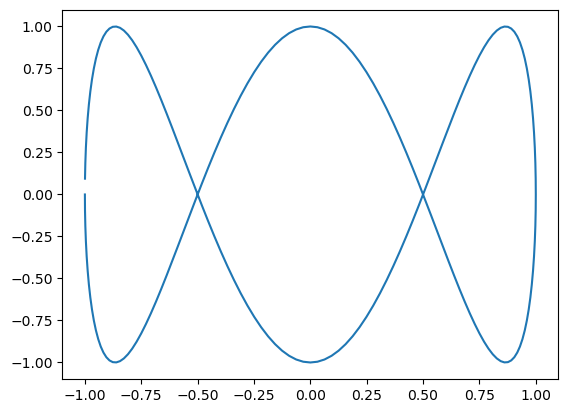

In [6]:
plt.plot(curve[:,0], curve[:,1])

## Evolute of a Planar Curve

In [7]:
Y = evolute(X)

In [8]:
Y

((4*cos(t)*sin(t)^2 - cos(t))*(9*abs(cos(3*t))^2 + abs(sin(t))^2)^(3/2)/(sqrt(144*cos(t)^6 - 216*cos(t)^4 + 80*cos(t)^2 + 1)*(cos(3*t)*cos(t) + 3*sin(3*t)*sin(t))) + cos(t), -1/3*(9*abs(cos(3*t))^2 + abs(sin(t))^2)^(3/2)*sin(t)/(sqrt(144*cos(t)^6 - 216*cos(t)^4 + 80*cos(t)^2 + 1)*(cos(3*t)*cos(t) + 3*sin(3*t)*sin(t))) + sin(3*t))

In [9]:
def evolute_function_handle(x) :
    
    return Y.subs(t = x, hold=False)

In [10]:
curve =  np.array(list(map(planar_curve,create_vector(t0,t1,(t1-t0)/nSamples)))) 
evolute_curve = np.array(list(map(evolute_function_handle,create_vector(t0,t1,(t1-t0)/nSamples)))) 

(-2.0, 2.0)

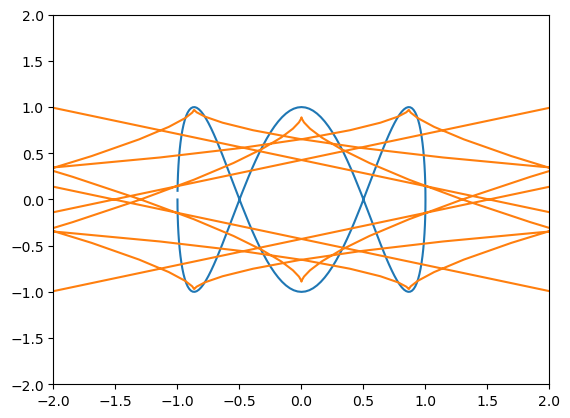

In [11]:
plt.plot(curve[:,0], curve[:,1])
plt.plot(evolute_curve[:,0], evolute_curve[:,1])
plt. xlim(float(min(curve[:,0])) - 1, float(max(curve[:,0])) + 1)
plt. ylim(float(min(curve[:,1])) - 1, float(max(curve[:,1])) + 1)

## Rotation Index

In [12]:
float(rotation_index(X,t0,t1))

Help file /Applications/usr/share/giac/doc/fr/aide_cas not found
Added 0 synonyms


1.0